# House Prices - Advanced Regression Techniques
- Predict sales prices and practice feature engineering, RFs, and gradient boosting
- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

# 0. 패키지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 1. 데이터셋

In [57]:
origin_df = pd.read_csv('train.csv').set_index('Id')
origin_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
test_df = pd.read_csv('test.csv').set_index('Id')
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


# 2. EDA

## 2.1 Info

In [5]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2.2 Describe

In [6]:
origin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## 2.3 상관계수 히트맵

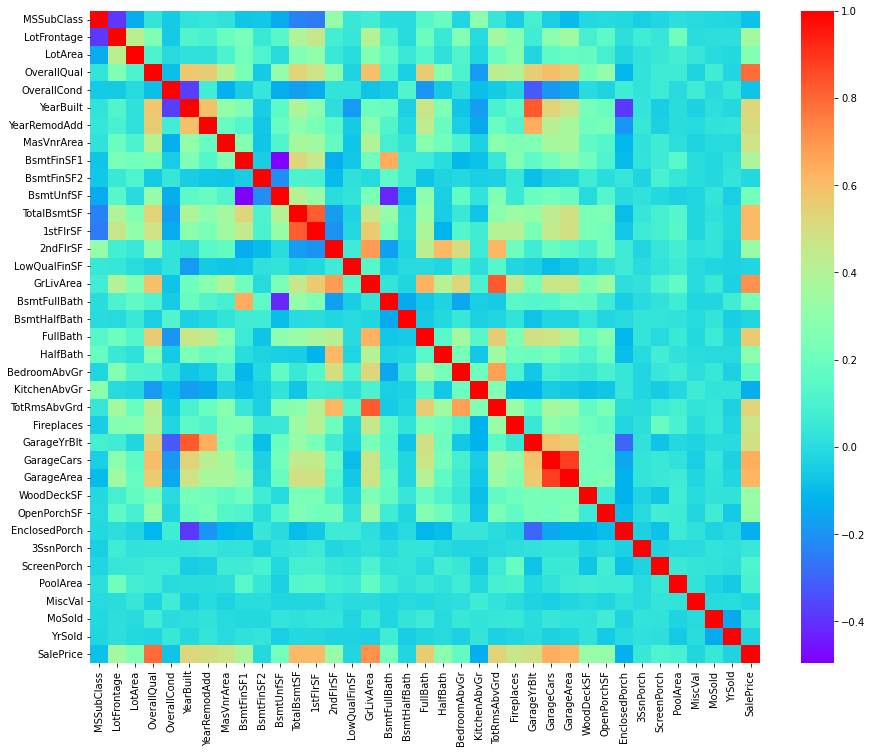

In [8]:
plt.figure(figsize=(15,12))

sns.heatmap(origin_df.corr(), cmap='rainbow')

plt.show()

## 2.4 SalePrice 상관계수

In [84]:
les = {}
tmp_df = origin_df[:]

for column in tmp_df.select_dtypes('object').columns :
    le = LabelEncoder()
    tmp_df[column] = le.fit_transform(tmp_df[column])
    les[column] = (le.classes_, le.transform(le.classes_))

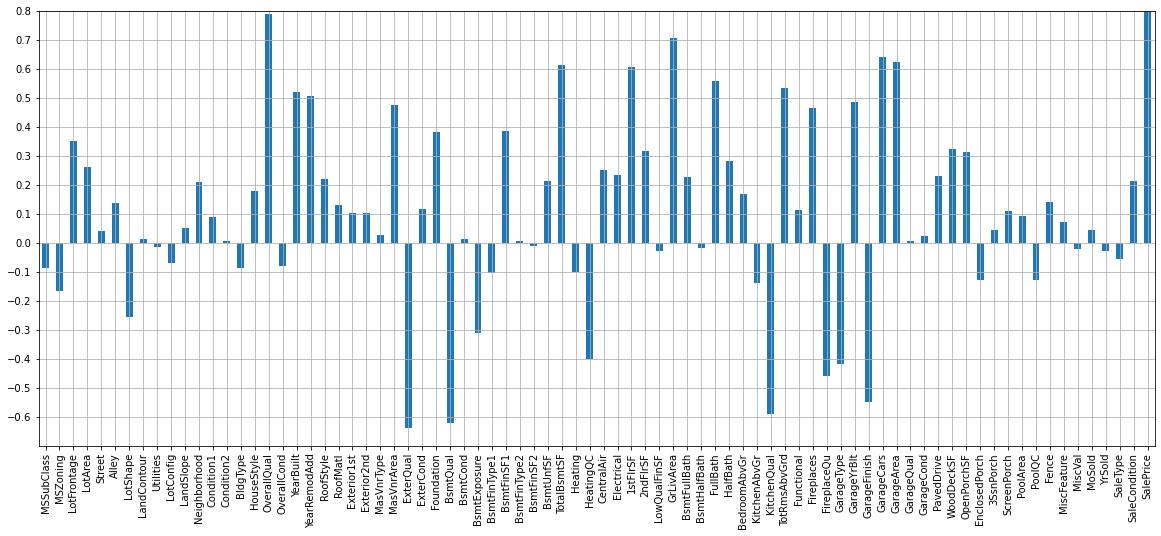

In [78]:
tmp_df.corr()['SalePrice'].plot(kind='bar', figsize=(20, 8))

plt.yticks(np.arange(-0.6, 1.01, 0.1))
plt.ylim(-0.7, 0.8)

plt.grid(True)

plt.show()

In [111]:
tmp_df.corr()['SalePrice'][tmp_df.corr()['SalePrice'].abs() >= 0.3]

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
ExterQual      -0.636884
Foundation      0.382479
BsmtQual       -0.620886
BsmtExposure   -0.309043
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
HeatingQC      -0.400178
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
FireplaceQu    -0.459605
GarageType     -0.415283
GarageYrBlt     0.486362
GarageFinish   -0.549247
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [119]:
origin_df.groupby('Fireplaces')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Fireplaces,,,,,,,,
0,690.0,141331.482609,44389.786884,34900.0,112000.0,135000.0,164375.0,342643.0
1,650.0,211843.909231,79531.825318,60000.0,158000.0,189975.0,254675.0,625000.0
2,115.0,240588.539130,117451.800525,100000.0,160750.0,206900.0,284500.0,755000.0
3,5.0,252000.000000,93313.986090,160000.0,190000.0,205000.0,345000.0,360000.0


In [147]:
origin_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [114]:
les['FireplaceQu']

(array(['Ex', 'Fa', 'Gd', 'Po', 'TA', nan], dtype=object),
 array([0, 1, 2, 3, 4, 5]))

# 3. 데이터 정제
  - 결측치가 50% 이상인 컬럼 제거 (Alley, PoolQC, Fence, MiscFeature)

In [65]:
enc = LabelEncoder()
enc.classes_ = np.array(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'nan']).astype('<U32')

In [66]:
enc.transform(np.array(['Ex', 'Ex', 'Gd', 'TA', 'Po', 'Fa', np.nan]))

array([0, 0, 1, 2, 4, 3, 6])

In [64]:
set(origin_df['FireplaceQu'].unique()), set(enc.classes_)

({'Ex', 'Fa', 'Gd', 'Po', 'TA', nan},
 {'Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA', 'nan'})